In [70]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# reading the dataset

In [71]:
df=pd.read_csv(r'E:\DATA SCIENCE\CODES and DOCS\DOCS\Car_Prices_Poland_Kaggle_org1.csv')
df.head()

,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,gen-d-2011,2015,139568.0,1248,Diesel,Janki,Mazowieckie,35900.0
1,opel,combo,gen-d-2011,2018,31991.0,1499,Diesel,Katowice,Śląskie,78501.0
2,opel,combo,gen-d-2011,2015,278437.0,1598,Diesel,Brzeg,Opolskie,27000.0
3,opel,combo,gen-d-2011,2016,47600.0,1248,Diesel,Korfantów,Opolskie,30800.0
4,opel,combo,gen-d-2011,2014,103000.0,1400,CNG,Tarnowskie Góry,Śląskie,35900.0


In [72]:
df.shape

(3216, 10)

In [73]:
df.columns

Index(['mark', 'model', 'generation_name', 'year', 'mileage', 'vol_engine',
       'fuel', 'city', 'province', 'price'],
      dtype='object')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mark             3216 non-null   object 
 1   model            3216 non-null   object 
 2   generation_name  2950 non-null   object 
 3   year             3216 non-null   int64  
 4   mileage          3198 non-null   float64
 5   vol_engine       3216 non-null   int64  
 6   fuel             3216 non-null   object 
 7   city             3216 non-null   object 
 8   province         3216 non-null   object 
 9   price            3199 non-null   float64
dtypes: float64(2), int64(2), object(6)
memory usage: 251.4+ KB


In [75]:
#Finding null values in the dataset
df.isna().sum()

mark                 0
model                0
generation_name    266
year                 0
mileage             18
vol_engine           0
fuel                 0
city                 0
province             0
price               17
dtype: int64

# Filling missing values

In [76]:
df['generation_name'].unique().size

10

In [77]:
df['generation_name'].mode()

0    gen-j-2009-2015
dtype: object

In [78]:
#filling the null values of column generation time with mode 
df['generation_name']=df['generation_name'].fillna('gen-j-2009-2015')


In [79]:
freq=df.select_dtypes(include=['float','int'])
freq

,mileage,price
0,139568.0,35900.0
1,31991.0,78501.0
2,278437.0,27000.0
3,47600.0,30800.0
4,103000.0,35900.0
...,...,...
3211,83282.0,48000.0
3212,100953.0,53900.0
3213,20800.0,68900.0
3214,6085.0,83900.0


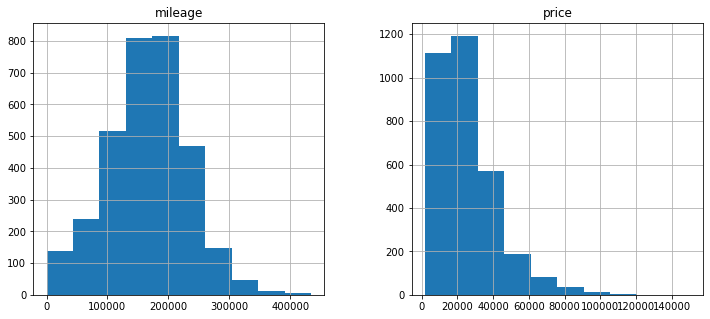

In [80]:
freq.hist(figsize=(12,5))
plt.show()

In [81]:
#Filling mileage with mean and price with median
df['mileage']=df['mileage'].fillna(df['mileage'].mean())
df['price']=df['price'].fillna(df['price'].mean())

In [82]:
df.isna().sum()

mark               0
model              0
generation_name    0
year               0
mileage            0
vol_engine         0
fuel               0
city               0
province           0
price              0
dtype: int64

In [83]:
df.groupby('model').mean()

,year,mileage,vol_engine,price
model,,,,
adam,2015.125000,73981.166667,1305.302083,35629.385417
agila,2007.845238,142339.880952,1125.000000,12466.166667
ampera,2013.100000,180200.900000,1258.200000,62070.000000
antara,2008.956250,188311.168750,2169.337500,28401.568750
astra,2010.452372,166330.250277,1562.736645,26257.515683
combo,2015.843750,140507.687500,1433.218750,39868.468750
vectra,2004.168000,231323.568000,1974.664000,10335.608000


In [84]:
df.groupby('mark').mean()

,year,mileage,vol_engine,price
mark,,,,
opel,2010.320585,166095.944028,1586.284204,26047.087215


In [85]:
df.vol_engine.nunique()

55

# Checking Outliers

<ipython-input-86-6b5971126d2e>:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Box plot for Mileage\n',fontSize=16)


Text(0.5, 1.0, 'Box plot for Mileage\n')

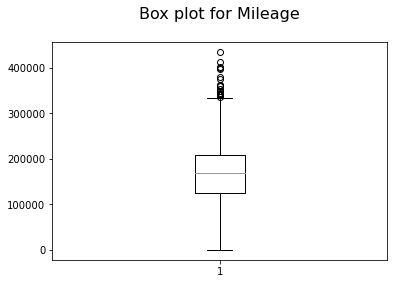

In [86]:
plt.boxplot(df['mileage'])
plt.title('Box plot for Mileage\n',fontSize=16)

In [87]:
Q1= np.percentile(df['mileage'],25,interpolation='midpoint')
Q2= np.percentile(df['mileage'],50,interpolation='midpoint')
Q3= np.percentile(df['mileage'],75,interpolation='midpoint')
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR


In [106]:
outlier=[]
for i in df['mileage']:
    if i<low_lim or i>up_lim:
        outlier.append(i)

In [107]:
outlier

[345000.0,
 401315.0,
 398119.0,
 375000.0,
 350000.0,
 400000.0,
 413000.0,
 363000.0,
 363000.0,
 379115.0,
 341000.0,
 354000.0,
 350000.0,
 341000.0,
 434400.0,
 340317.0,
 360000.0,
 340000.0,
 343000.0,
 339714.0,
 360000.0,
 350000.0,
 341667.0,
 348856.0,
 342765.0,
 335000.0,
 339600.0]

In [113]:
lis1=df['mileage']>up_lim
index_up=df.loc[lis1].index
lis2=df['mileage']<low_lim
index_low=df.loc[lis2].index

In [116]:
index_up

Int64Index([  66,   69,  158,  164,  171,  182,  475,  552,  584,  654,  752,
             774,  786,  859,  874,  915,  934, 1091, 1233, 1247, 1314, 1332,
            1416, 1425, 1466, 1474, 2180],
           dtype='int64')

In [118]:
index_low

Int64Index([], dtype='int64')

In [120]:
df.drop(index_up,inplace=True)

In [121]:
df.shape

(3189, 10)